# Getting Started with Nelpy

Welcome to **nelpy**! This notebook will guide you through the basics of using nelpy for neural data analysis.

We'll cover installation, basic data structures, and a minimal workflow.

## Installation

If you haven't already, install nelpy (and dependencies) using pip or conda.

```bash
pip install nelpy
```

Or, for the latest development version:

```bash
pip install git+https://github.com/nelpy/nelpy.git
```

## Importing nelpy

Let's import the main nelpy modules.

In [1]:
import nelpy as nel
import numpy as np
import matplotlib.pyplot as plt
import nelpy.plotting as npl

# assume default aesthetics
npl.setup()

## Simulate or Load Data

For this demo, we'll simulate some spike times and position data.

In [2]:
# Simulate spike times for 3 units
np.random.seed(42)
n_units = 3
duration = 10.0  # seconds
spike_times = [np.sort(np.random.uniform(0, duration, size=50)) for _ in range(n_units)]

# Simulate 1D position sampled at 100 Hz
fs = 100
t = np.arange(0, duration, 1 / fs)
position = np.sin(2 * np.pi * t / duration)  # simple oscillatory trajectory


## Create Nelpy Objects

Let's create an SpikeTrainArray for spikes and an AnalogSignalArray for position.

In [3]:
# Create EventArray for spikes
spk = nel.SpikeTrainArray(timestamps=spike_times, fs=fs)

# Create AnalogSignalArray for position
asa = nel.AnalogSignalArray(data=position, fs=fs)

epoch_1 = nel.EpochArray([3,4])
print(spk)
print(asa)
print(epoch_1)

<SpikeTrainArray at 0x1d392f43590: 3 units> at 100 Hz
<AnalogSignalArray at 0x1d392dbd590: 1 signals> for a total of 10 seconds
<EpochArray at 0x1d3911abd90: 1 epoch> of length 1 seconds


## Basic Plotting

Let's plot the spike raster and position trace.

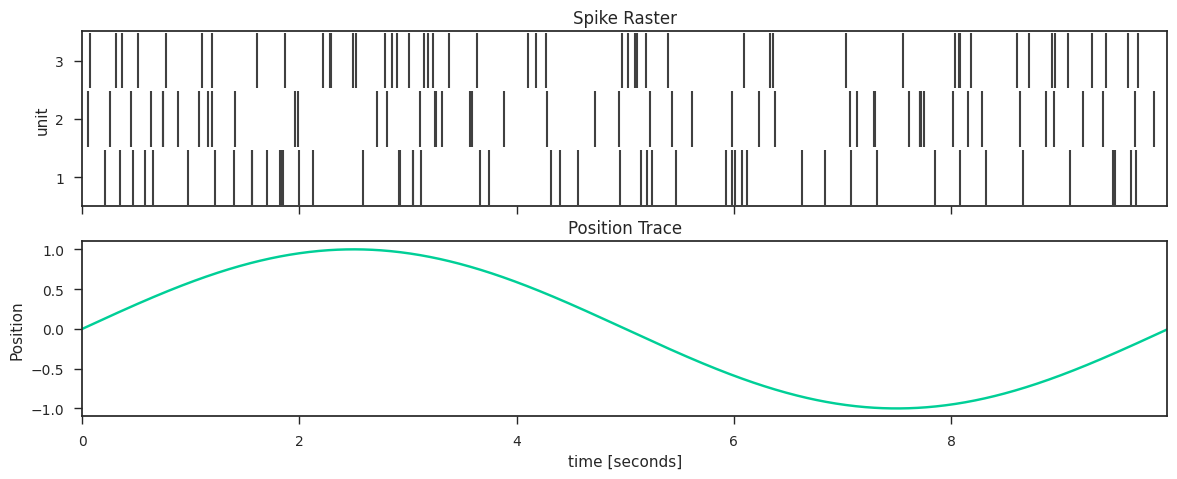

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# use nelpy to plot the spike raster
npl.rasterplot(spk, ax=ax[0])
ax[0].set_ylabel("unit")
ax[0].set_title("Spike Raster")

npl.plot(asa, ax=ax[1])

ax[1].set_xlabel("time [seconds]")
ax[1].set_ylabel("Position")
ax[1].set_title("Position Trace")
plt.show()

## slice the data with EpochArray

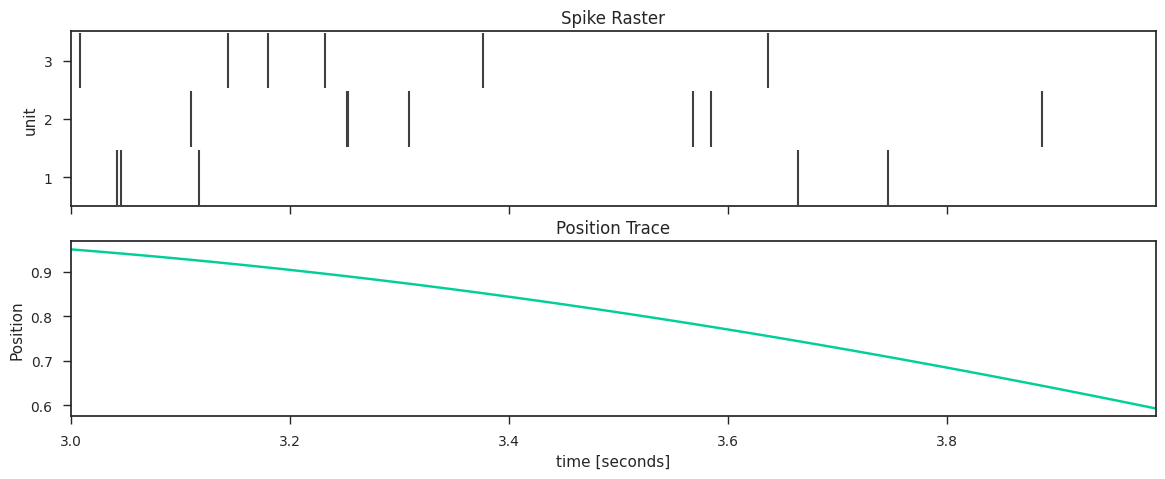

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# use nelpy to plot the spike raster
npl.rasterplot(spk[epoch_1], ax=ax[0])
ax[0].set_ylabel("unit")
ax[0].set_title("Spike Raster")

npl.plot(asa[epoch_1], ax=ax[1])

ax[1].set_xlabel("time [seconds]")
ax[1].set_ylabel("Position")
ax[1].set_title("Position Trace")
plt.show()

## Minimal End-to-End Workflow

Let's bin the spikes, compute a simple firing rate, and plot it alongside position.

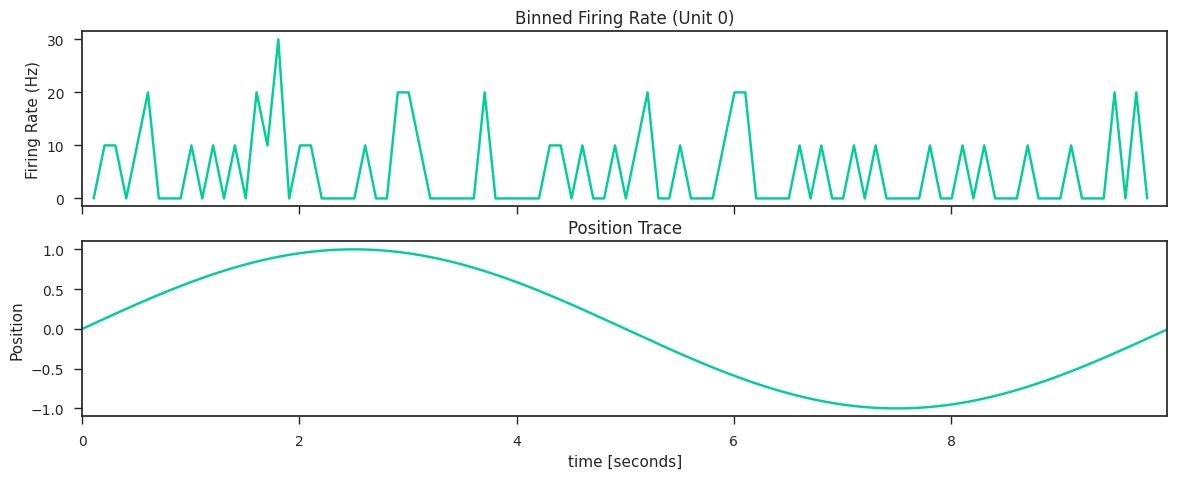

In [6]:
# Bin spikes
bin_size = 0.1  # seconds
binned = spk.bin(ds=bin_size)

# Compute firing rate (spikes per bin / bin size)
firing_rate = binned.data / bin_size
bin_centers = binned.bin_centers

# Plot firing rate for first unit
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True)
ax[0].plot(bin_centers, firing_rate[0], label="Unit 0")
ax[0].set_ylabel("Firing Rate (Hz)")
ax[0].set_title("Binned Firing Rate (Unit 0)")

npl.plot(asa, ax=ax[1])

ax[1].set_xlabel("time [seconds]")
ax[1].set_ylabel("Position")
ax[1].set_title("Position Trace")

plt.show()

## Next Steps

- Explore the [API Reference](../reference/core.md) for more details on nelpy objects.
- Try running the other tutorials in the `tutorials/` folder.
- Check out the [GitHub repo](https://github.com/nelpy/nelpy) for more info and updates.

Happy analyzing!